In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas

In [1]:
order = [
    "Houcemeddine Turki - User:Csisc",
    "Sailesh Patnaik - User:Saileshpat",
    "Dariusz Jemielniak - User:pundit",
    "Mohamed Ouda - User:Mohamed Ouda",
    "Josh Lim - User:Sky Harbor",
    "David Conway - User:Smerus",
    "Francis Kaswahili Kaguna - User:Francis Kaswahili",
    "Cristian Consonni - User:CristianCantoro",
    "Peter Gallert - User:Pgallert",
    "María Sefidari - User:Raystorm",
    "Phoebe Ayers - User:phoebe",
    "Denny Vrandečić - User:Denny",
    "Ali Haidar Khan (Tonmoy) - User:Ali Haidar Khan",
    "Nisar Ahmed Syed - User:అహ్మద్ నిసార్",
    "James Heilman - User:Doc James",
    "Tim Davenport - User:Carrite",
    "Samuel Klein - User:Sj",
    "Syed Muzammiluddin - User:Hindustanilanguage",
    "Edward Saperia - User:EdSaperia",
    "Mike Nicolaije - User:Taketa",
    "Pete Forsyth - User:PeteForsyth",
]

In [29]:
#TODO names=order

ballots = pandas.read_csv("2015 ballots.txt", header=None)

# Count number of each vote, for each ballot.
voter_tactics = pandas.DataFrame(columns=[1,0,-1])
for rownum, ballot in ballots.iterrows():
    counts = ballot.value_counts()
    voter_tactics = voter_tactics.append(counts)

# Zero out NaNs
voter_tactics = voter_tactics.fillna(value=0)

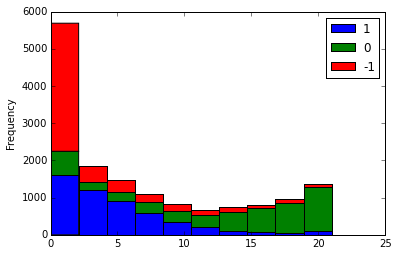

In [41]:
voter_tactics.plot(kind='hist', stacked=True);

In [ ]:
# TODO:
# - Heuristic for determining likelihood of tactical voting.
# - Which candidates got tactical and non-tactical votes?